# Predicción de Gasto Mensual - RetailBoost

## Objetivo
Predecir el gasto mensual de clientes usando regresión lineal.

**Variables disponibles:**
- `income`: Ingresos
- `age`: Edad  
- `visits_per_month`: Visitas mensuales
- `satisfaction_score`: Satisfacción (1-5)
- `membership_years`: Años de membresía
- `monthly_spent`: **Objetivo** - Gasto mensual

## 1. Importar Librerías y Cargar Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Cargar datos
df = pd.read_csv('../data/retailboost_customers_regression.csv')
print(f"Dataset: {df.shape[0]} registros, {df.shape[1]} columnas")
df.head()

Dataset: 500 registros, 7 columnas


,customer_id,age,income,visits_per_month,satisfaction_score,membership_years,monthly_spent
0,1,56,5122.16,8,4,9,2555.68
1,2,69,4032.47,7,5,0,1737.75
2,3,46,1480.63,9,4,13,1031.05
3,4,32,2515.77,7,1,2,730.76
4,5,60,4266.91,12,1,13,1496.51


## 2. Exploración de Datos

In [2]:
# Estadísticas descriptivas
print("Estadísticas del gasto mensual:")
print(f"Media: ${df['monthly_spent'].mean():.2f}")
print(f"Mediana: ${df['monthly_spent'].median():.2f}")
print(f"Rango: ${df['monthly_spent'].min():.2f} - ${df['monthly_spent'].max():.2f}")

# Verificar valores nulos
print(f"\nValores nulos: {df.isnull().sum().sum()}")

Estadísticas del gasto mensual:
Media: $1185.08
Mediana: $1152.37
Rango: $50.00 - $4388.77

Valores nulos: 0


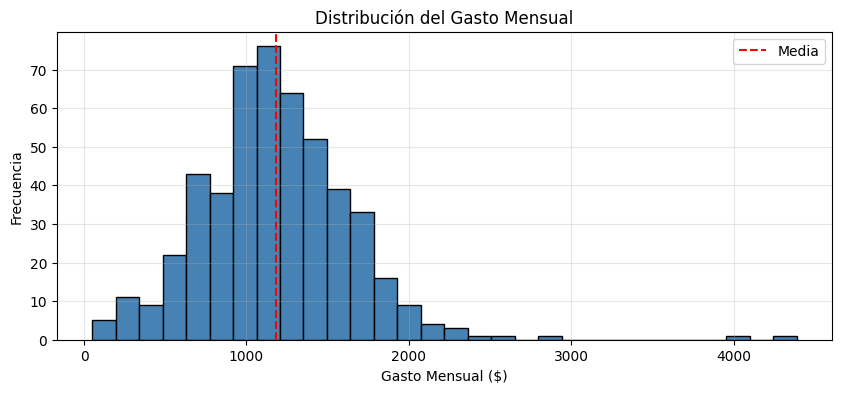

In [3]:
# Distribución de la variable objetivo
plt.figure(figsize=(10, 4))
plt.hist(df['monthly_spent'], bins=30, color='steelblue', edgecolor='black')
plt.axvline(df['monthly_spent'].mean(), color='red', linestyle='--', label='Media')
plt.xlabel('Gasto Mensual ($)')
plt.ylabel('Frecuencia')
plt.title('Distribución del Gasto Mensual')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

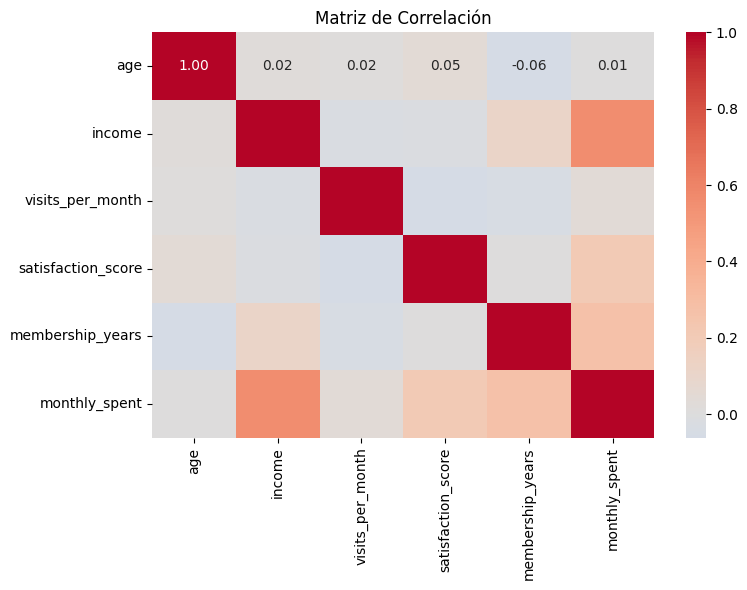


Correlación con monthly_spent:
monthly_spent         1.000000
income                0.559534
membership_years      0.269133
satisfaction_score    0.211600
visits_per_month      0.041673
age                   0.005934
Name: monthly_spent, dtype: float64


In [4]:
# Matriz de correlación
numeric_cols = ['age', 'income', 'visits_per_month', 'satisfaction_score', 'membership_years', 'monthly_spent']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

print("\nCorrelación con monthly_spent:")
print(corr_matrix['monthly_spent'].sort_values(ascending=False))

**Observación:** `income` tiene la correlación más fuerte (0.56) con el gasto mensual.

## 3. Preparación de Datos

In [5]:
# Separar features y target
features = ['age', 'income', 'visits_per_month', 'satisfaction_score', 'membership_years']
X = df[features]
y = df['monthly_spent']

# Dividir en train y test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Entrenamiento: {len(X_train)} registros")
print(f"Prueba: {len(X_test)} registros")

Entrenamiento: 400 registros
Prueba: 100 registros


## 4. Modelo 1: Regresión Lineal Simple

Usaremos solo `income` (variable con mayor correlación).

In [6]:
# Entrenar modelo simple
modelo_simple = LinearRegression()
modelo_simple.fit(X_train[['income']], y_train)

# Predicciones
y_pred_simple = modelo_simple.predict(X_test[['income']])

# Métricas
r2_simple = r2_score(y_test, y_pred_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))

print("MODELO SIMPLE (income)")
print("="*50)
print(f"Ecuación: monthly_spent = {modelo_simple.intercept_:.2f} + {modelo_simple.coef_[0]:.2f} × income")
print(f"\nR²: {r2_simple:.4f} ({r2_simple*100:.2f}% variabilidad explicada)")
print(f"MAE: ${mae_simple:.2f}")
print(f"RMSE: ${rmse_simple:.2f}")

MODELO SIMPLE (income)
Ecuación: monthly_spent = 365.78 + 0.27 × income

R²: 0.2236 (22.36% variabilidad explicada)
MAE: $273.41
RMSE: $435.06


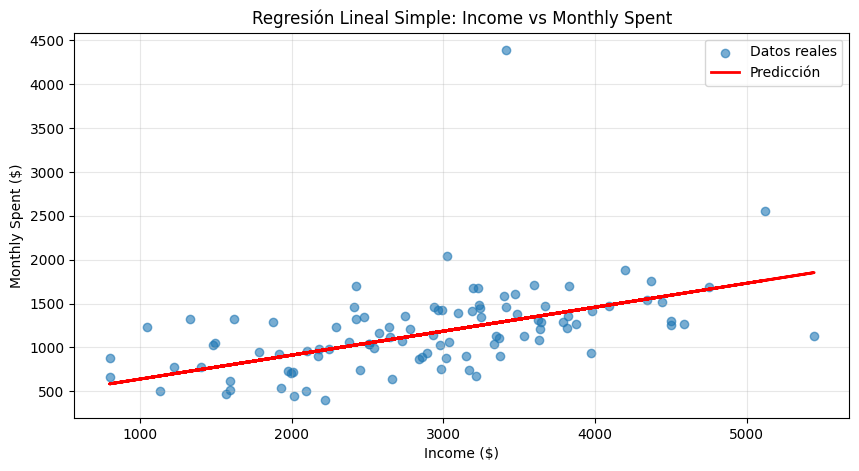

In [7]:
# Visualizar ajuste
plt.figure(figsize=(10, 5))
plt.scatter(X_test['income'], y_test, alpha=0.6, label='Datos reales')
plt.plot(X_test['income'], y_pred_simple, color='red', linewidth=2, label='Predicción')
plt.xlabel('Income ($)')
plt.ylabel('Monthly Spent ($)')
plt.title('Regresión Lineal Simple: Income vs Monthly Spent')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 5. Modelo 2: Regresión Lineal Múltiple

Usaremos todas las variables disponibles.

In [8]:
# Entrenar modelo múltiple
modelo_multiple = LinearRegression()
modelo_multiple.fit(X_train, y_train)

# Predicciones
y_pred_multiple = modelo_multiple.predict(X_test)

# Métricas
r2_multiple = r2_score(y_test, y_pred_multiple)
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
rmse_multiple = np.sqrt(mean_squared_error(y_test, y_pred_multiple))

print("MODELO MÚLTIPLE")
print("="*50)
print("Coeficientes:")
for feature, coef in zip(features, modelo_multiple.coef_):
    print(f"  {feature:20s}: {coef:8.2f}")
print(f"  Intercepto         : {modelo_multiple.intercept_:8.2f}")
print(f"\nR²: {r2_multiple:.4f} ({r2_multiple*100:.2f}% variabilidad explicada)")
print(f"MAE: ${mae_multiple:.2f}")
print(f"RMSE: ${rmse_multiple:.2f}")

MODELO MÚLTIPLE
Coeficientes:
  age                 :     0.08
  income              :     0.26
  visits_per_month    :    14.75
  satisfaction_score  :    71.50
  membership_years    :    21.94
  Intercepto         :   -78.58

R²: 0.3397 (33.97% variabilidad explicada)
MAE: $240.69
RMSE: $401.21


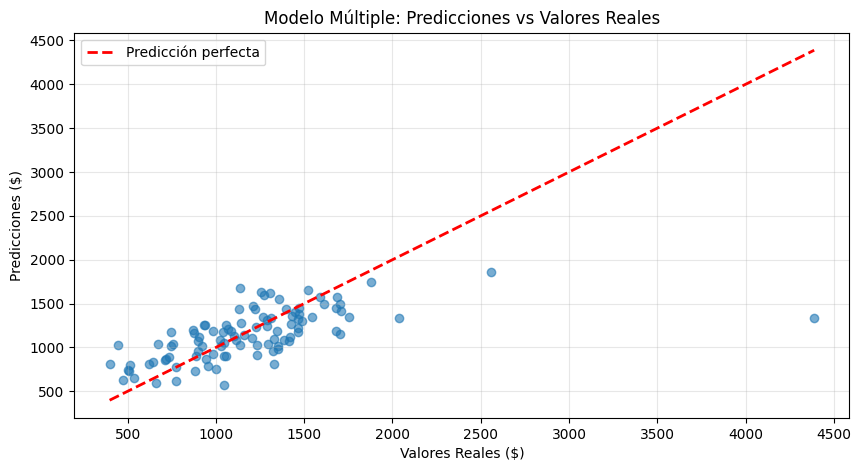

In [9]:
# Gráfico de predicciones vs valores reales
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_multiple, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Predicción perfecta')
plt.xlabel('Valores Reales ($)')
plt.ylabel('Predicciones ($)')
plt.title('Modelo Múltiple: Predicciones vs Valores Reales')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 6. Comparación de Modelos

In [10]:
# Tabla comparativa
comparacion = pd.DataFrame({
    'Modelo': ['Simple (income)', 'Múltiple (5 variables)'],
    'R²': [r2_simple, r2_multiple],
    'MAE ($)': [mae_simple, mae_multiple],
    'RMSE ($)': [rmse_simple, rmse_multiple]
})

print("\nCOMPARACIÓN DE MODELOS")
print("="*60)
print(comparacion.to_string(index=False))

# Calcular mejora
mejora_r2 = ((r2_multiple - r2_simple) / r2_simple) * 100
mejora_mae = ((mae_simple - mae_multiple) / mae_simple) * 100

print(f"\nMejora del modelo múltiple:")
print(f"  R²: +{mejora_r2:.1f}%")
print(f"  MAE: -{mejora_mae:.1f}% (menos error)")


COMPARACIÓN DE MODELOS
                Modelo       R²    MAE ($)   RMSE ($)
       Simple (income) 0.223575 273.406780 435.059049
Múltiple (5 variables) 0.339701 240.693186 401.207066

Mejora del modelo múltiple:
  R²: +51.9%
  MAE: -12.0% (menos error)


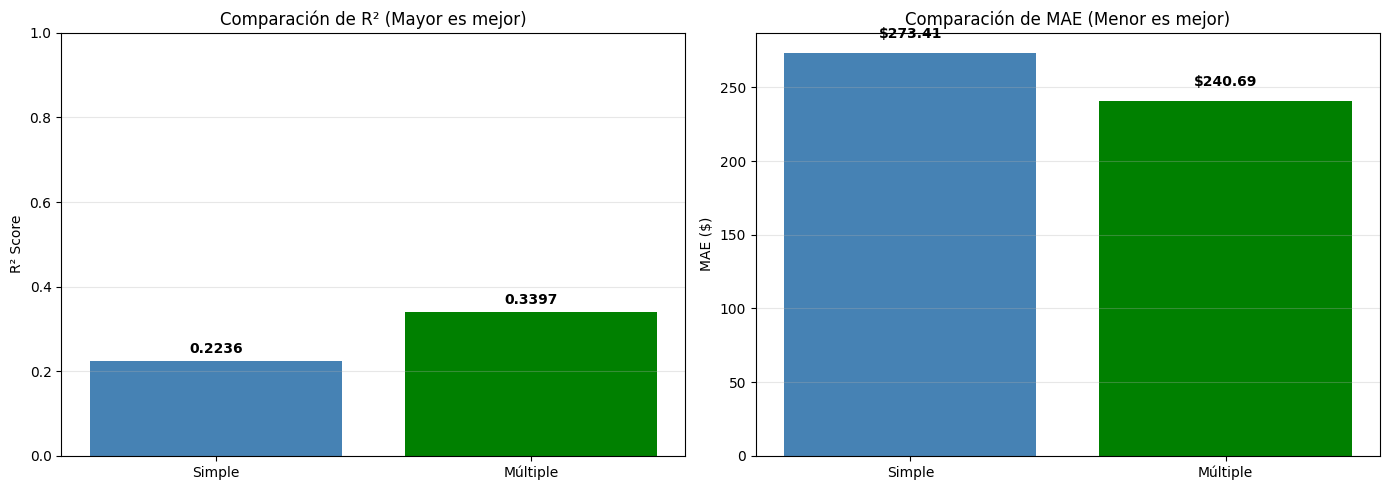

In [11]:
# Gráfico comparativo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R²
axes[0].bar(['Simple', 'Múltiple'], [r2_simple, r2_multiple], color=['steelblue', 'green'])
axes[0].set_ylabel('R² Score')
axes[0].set_title('Comparación de R² (Mayor es mejor)')
axes[0].set_ylim(0, 1)
axes[0].grid(alpha=0.3, axis='y')
for i, v in enumerate([r2_simple, r2_multiple]):
    axes[0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

# MAE
axes[1].bar(['Simple', 'Múltiple'], [mae_simple, mae_multiple], color=['steelblue', 'green'])
axes[1].set_ylabel('MAE ($)')
axes[1].set_title('Comparación de MAE (Menor es mejor)')
axes[1].grid(alpha=0.3, axis='y')
for i, v in enumerate([mae_simple, mae_multiple]):
    axes[1].text(i, v + 10, f'${v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Conclusiones

### Resultados del Análisis

**Datos:**
- Dataset de 500 clientes
- Gasto mensual promedio: $1,185
- Sin valores nulos

**Modelo Simple (solo income):**
- R² = 0.22 → Explica solo el 22% de la variabilidad
- MAE = $273 → Error promedio de $273
- Limitado: una sola variable no captura toda la complejidad

**Modelo Múltiple (5 variables):**
- R² = 0.34 → Explica el 34% de la variabilidad
- MAE = $241 → Error promedio reducido a $241
- Mejora de 52% en R² respecto al simple

### Variables más Influyentes

1. **Income** (coef: 0.26): A mayor ingreso, mayor gasto
2. **Satisfaction_score** (coef: 71.50): Clientes satisfechos gastan más
3. **Membership_years** (coef: 21.94): La lealtad incrementa el gasto
4. **Visits_per_month** (coef: 14.75): Más visitas = más gasto
5. **Age** (coef: 0.08): Impacto mínimo

### Calidad del Ajuste

El modelo múltiple explica un 34% de la variabilidad, lo cual es **moderado**. Esto indica que:
- Hay otras variables no incluidas que también influyen en el gasto
- El comportamiento de compra tiene componentes no predecibles
- El error de $241 representa un 20% del gasto promedio, aceptable pero mejorable

### Recomendaciones para RetailBoost

1. **Segmentar por ingresos**: Crear estrategias diferenciadas por nivel de income
2. **Mejorar satisfacción**: Es el segundo factor más importante
3. **Programa de fidelización**: Retener clientes de largo plazo aumenta gasto
4. **Incentivar visitas**: Cada visita adicional suma $15 al gasto mensual

### Próximos Pasos

- Explorar modelos no lineales (Random Forest, XGBoost)
- Agregar variables: historial de compras, categoría de productos, estacionalidad
- Probar regularización (Ridge/Lasso) para mejorar generalización